In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import datetime
import matplotlib.dates as mdates
import glob
import json
import numpy as np

In [2]:
# List of csv files directories
csv_dirs = glob.glob("./data/debt_collector_query_result/*")
# ['query_num', 'post_id', 'party_name', 'case_number', 'case_type', 'case_status', 'file_date', 'status_date']
csv_dirs

['./data/debt_collector_query_result/National_Credit_Services.csv',
 './data/debt_collector_query_result/Affiliate_Asset_Solutions.csv',
 './data/debt_collector_query_result/Statebridge_Company.csv',
 './data/debt_collector_query_result/STONELEIGH_RECOVERY_ASSOCIATES.csv',
 './data/debt_collector_query_result/Aspen_National_Financial.csv',
 './data/debt_collector_query_result/TriVerity.csv',
 './data/debt_collector_query_result/National_Collection_Systems.csv',
 './data/debt_collector_query_result/redit_Control.csv',
 './data/debt_collector_query_result/Valentine_&_Kebartas.csv',
 './data/debt_collector_query_result/Enhanced_Recovery_Company.csv',
 './data/debt_collector_query_result/J.M._Adjustment_Services.csv',
 './data/debt_collector_query_result/ife_Line_Billing_Systems.csv',
 './data/debt_collector_query_result/Franklin_Credit_Management_Corporatio.csv',
 './data/debt_collector_query_result/The_CBE_Group.csv',
 './data/debt_collector_query_result/American_Coradius_International.c

In [3]:
def analyze_bank(filepath):
    total_count = 0
    case_type = {}
    case_status = {}
    
    date_filed = {}
    #for i in range(1990, 2025):
    #    date_filed[i] = 0
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)
        
        for entry in reader:
            total_count += 1
            
            #update case type
            if entry[4] in case_type:
                case_type[entry[4]] += 1
            else:
                case_type[entry[4]] = 1
            
            #update case status
            if entry[5] in case_status:
                case_status[entry[5]] += 1
            else:
                case_status[entry[5]] = 1
                
            #update date
            if int(entry[6][:4]) in date_filed:
                date_filed[int(entry[6][:4])] += 1
            else:
                date_filed[int(entry[6][:4])] = 1

            #date_filed[int(entry[5][:4])] += 1
                
        
    
    return [total_count, case_type, case_status, date_filed]

In [4]:
def plot_dict_bar(d):
    #d = sorted(d, key=lambda a: d[a])
    #print(d)
    
    labels = []
    sizes = []
    
    for x, y in d.items():
        labels.append(x)
        sizes.append(y)
    
    # Plot
    plt.bar(labels, sizes)
    plt.xticks(rotation=90)
    plt.show()

In [5]:
def plot_dict_pie(d):
    #d = sorted(d, key=lambda a: d[a])
    #print(d)
    
    labels = []
    sizes = []
    
    for x, y in d.items():
        labels.append(x)
        sizes.append(y)
        
    labels = [f'{l}, {s:0.1f}' for l, s in zip(labels, sizes)]
    
    # Plot
    plt.pie(x=sizes)
    plt.legend(labels, loc=5)
    plt.show()

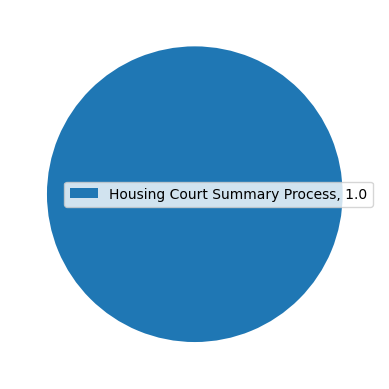

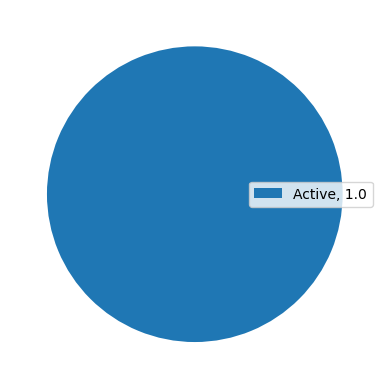

In [6]:
[total_count, case_type, case_status, _] = analyze_bank(csv_dirs[0])
plot_dict_pie(case_type)
plot_dict_pie(case_status)

In [7]:
all_info = {}
for path in csv_dirs:
    all_info[path] = analyze_bank(path)
    
print(all_info["./data/debt_collector_query_result/American_Profit_Recovery.csv"])



[86, {'Small Claims': 70, 'Civil': 14, 'Supplementary Process': 2}, {'Disposed (Statistical Purposes)': 85, 'Pending': 1}, {2011: 3, 2008: 66, 2007: 13, 2006: 3, 2010: 1}]


In [8]:
# Total cases for each banks
case_count = [(bank_name, all_info[bank_name][0]) for bank_name in all_info.keys()]

s_cases = sorted(case_count, key = lambda x : x[1], reverse=True)
df = pd.DataFrame(data=dict(s_cases), index=[0])
df = df.T
df.to_excel('dict1.xlsx')

In [9]:
# Case types for all companies
case_type_count = []
for bank_name in all_info.keys():
    case_types = all_info[bank_name][1]
    case_types['company_name'] = bank_name
    case_type_count += [case_types]
    
#case_type_count
df = pd.DataFrame(case_type_count)
df.replace(np.nan,0)
df.to_excel("case_type_count.xlsx")  

In [10]:
###### Analyze each bank info
path ="./data/debt_collector_query_result/Midland_Funding.csv"

print(f"Company name: {path}")
print(f"Total case count: {all_info[path][0]}")
plot_dict_pie(all_info[path][1])
plot_dict_pie(all_info[path][2])

Company name: ./data/debt_collector_query_result/Midland_Funding.csv
Total case count: 215179


ValueError: Unknown format code 'f' for object of type 'str'

In [11]:
# Date of case filed
path ='./bank_as_plantiff/chase_bank.csv'
print(f"Bank name: {path}")
print(all_info[path][3])

with open('bank_date.csv', mode='w') as csv_file:
    fieldnames = ["company_name", -111] + [i for i in range(2000, 2024)]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for key in all_info.keys():
        writer.writerow({**{'company_name': key}, **all_info[key][3]})

Bank name: ./bank_as_plantiff/chase_bank.csv


KeyError: './bank_as_plantiff/chase_bank.csv'

In [12]:
# Case status
path ='./bank_as_plantiff/chase_bank.csv'
print(f"Bank name: {path}")
print(all_info[path][2])

with open('bank_case_status.csv', mode='w') as csv_file:
    fieldnames = ["company_name", 
                  "Disposed (Statistical Purposes)", 'Closed', 'Pending', 
                  'Closed (Transferred)', 'Open', 'Suspended', 'Active', 
                  'Covid 19 XXX Notice Issued', 'Reopened', 'Inactive', 
                  'Suspended Covid 19 extended', 'Suspended- COVID 19-Extend-Notices sent', 
                  'Suspended-Covid-19', 'Suspended-Notices sent Covid-19', 
                  'Suspended COVID19 - TBD', 'Suspended - Notices sent Covid-19', '']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for key in all_info.keys():
        writer.writerow({**{'company_name': key}, **all_info[key][2]})
    

Bank name: ./bank_as_plantiff/chase_bank.csv


KeyError: './bank_as_plantiff/chase_bank.csv'

In [36]:
# Case duration if the case is closed (or disposed)
def analyze_duration(filepath):
    total_count = 0
    average_duration = 0
    durations = []
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)
        
        for entry in reader:
            if entry[4] in ["Disposed (Statistical Purposes)", 'Closed']:
                total_count += 1
                start_date = datetime.datetime(int(entry[5][:4]), int(entry[5][4:6]), int(entry[5][6:]))
                end_date = datetime.datetime(int(entry[6][:4]), int(entry[6][4:6]), int(entry[6][6:]))
                
                diff_date = end_date - start_date
                
                durations += [diff_date]
                
    average_duration = sum(durations, datetime.timedelta(0)) / len(durations)
    print(average_duration)
    
    return durations

253 days, 0:30:01.762977
107 days, 15:30:17.408124
243 days, 13:04:38.797531
278 days, 19:38:35.923567
94 days, 10:57:06.737968
739 days, 23:04:36.923077
156 days, 3:05:16.930023
189 days, 15:38:12.358804
198 days, 1:14:27.512195
154 days, 20:37:33.108714


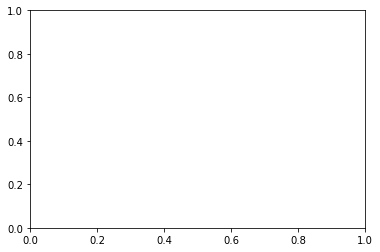

In [49]:
for path in csv_dirs:
    #print(path)
    n_bins = 30
    durations = analyze_duration(path)
    durations = [t.days for t in durations]
    fig= plt.hist(durations,  bins=n_bins)
    plt.xlabel('Case Durations (days)')
    plt.ylabel('Number of cases')
    plt.savefig(path + '.png')
    plt.cla()


In [55]:
# More accurate case date
def analyze_starting_date(filepath):
    total_count = 0
    start_dates = []
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)
        
        for entry in reader:
            try:
                start_date = datetime.datetime(int(entry[5][:4]), int(entry[5][4:6]), int(entry[5][6:]))
            except:
                continue
            total_count += 1
            start_dates += [start_date]
                
    return start_dates

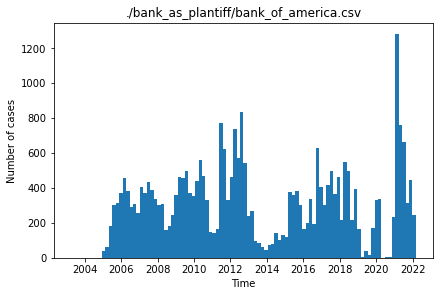

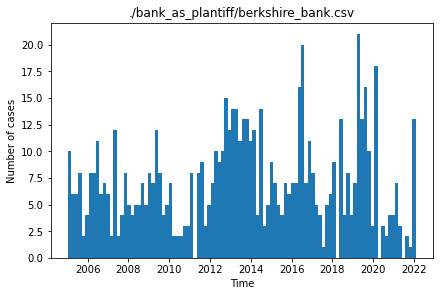

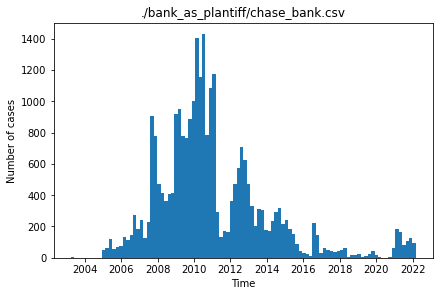

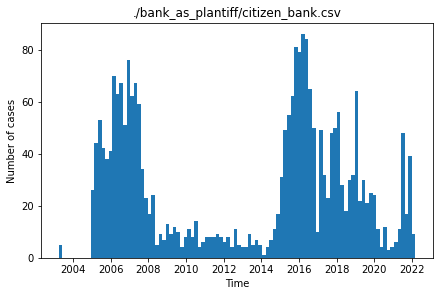

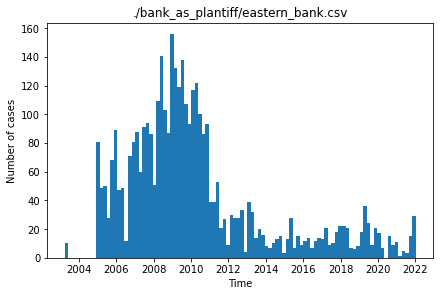

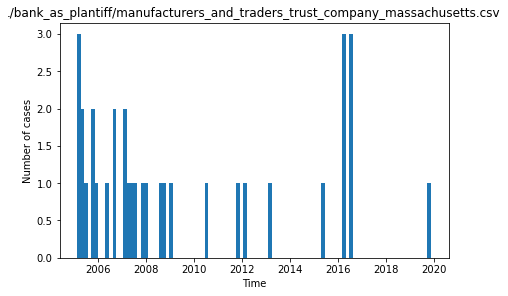

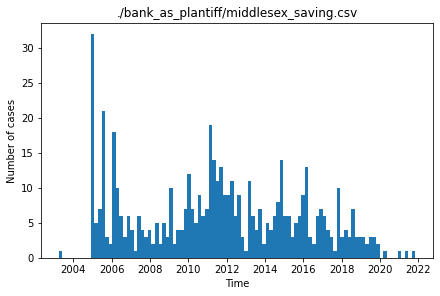

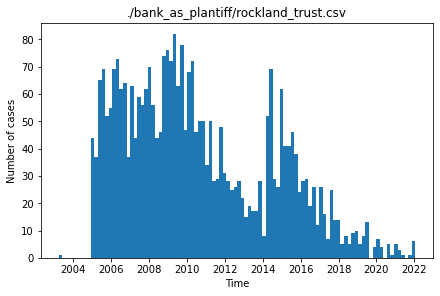

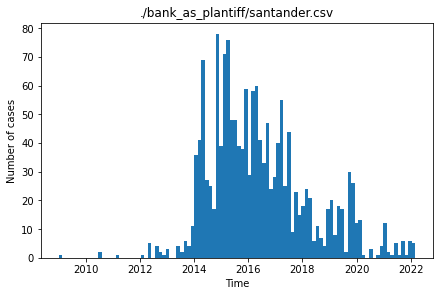

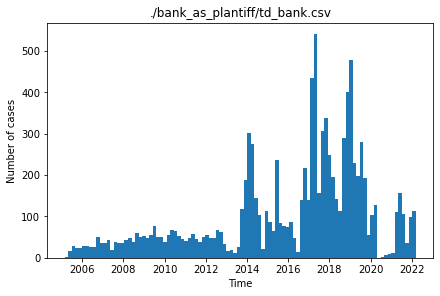

In [60]:
for path in csv_dirs:
    start_dates = analyze_starting_date(path)
    
    base = datetime.datetime(2005, 2, 1)
    n_bins = 100
    dates = start_dates
    N = len(dates)
    
    fig, ax = plt.subplots(constrained_layout=True)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    ax.hist(dates, bins=n_bins)
    ax.set_title(path)
    
    plt.xlabel('Time')
    plt.ylabel('Number of cases')
    
    plt.savefig(path + '.png')